# Lab 1: Exploratory Data Analysis (EDA)

This lab exercise demonstrates EDA of an example dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> *"At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."*
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a>

## A. Importing Modules and Dataset

In [222]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file.
The file loans_train.csv is expected to be in the same directory as this notebook.

In [223]:
df = pd.read_csv('./bank.csv')

# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [224]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [225]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We can see that the dataset has 614 data rows, and both numerical and categorical attributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

The last attribute `Loan_Status` indicates whether a loan was granted (Y) or not (N). This attribute would be a primary candidate for an attribute to *learn* to predict from the values of the other attributes. Before building a predictive model, though, the first step is to get to know the dataset better (the goal of this exercise) and prepare it for machine learning (the goal of the next exercise).

#### B.1. Quick Examination of Numerical Attributes

In [226]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


There are a few inferences we can draw by looking at the output of `describe()`:

- `LoanAmount` has (614 – 592) 22 missing values.
- `Loan_Amount_Term` has (614 – 600) 14 missing values.
- `Credit_History` has (614 – 564) 50 missing values.

Note that `Credit_History` is rather a categorical attribute despite having numerical values. We can see that about 84% of the applicants have a credit history. How? `Credit_History` has value 1 for those who have a credit history, and 0 otherwise. The mean of `Credit_History` is 0.84, i.e. 84% of the applicants have a credit history.

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

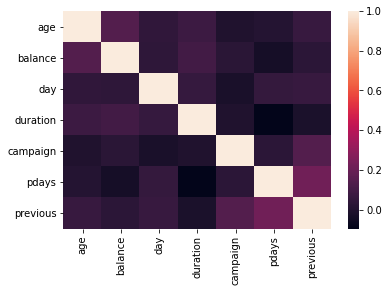

In [227]:
#correlation matrix
sns.heatmap(df.corr());

The heat map suggests correlation greater than 0 between `LoanAmount` and the three attributes `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term`. Although, the most significant correlation is between `LoanAmount` and `ApplicantIncome`. That is, applicants with low income tend to request lower loan amounts than applicants with higher income according to the examples in the dataset.

We can further examine the pairwise distribution between `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term` a **pair plot**.

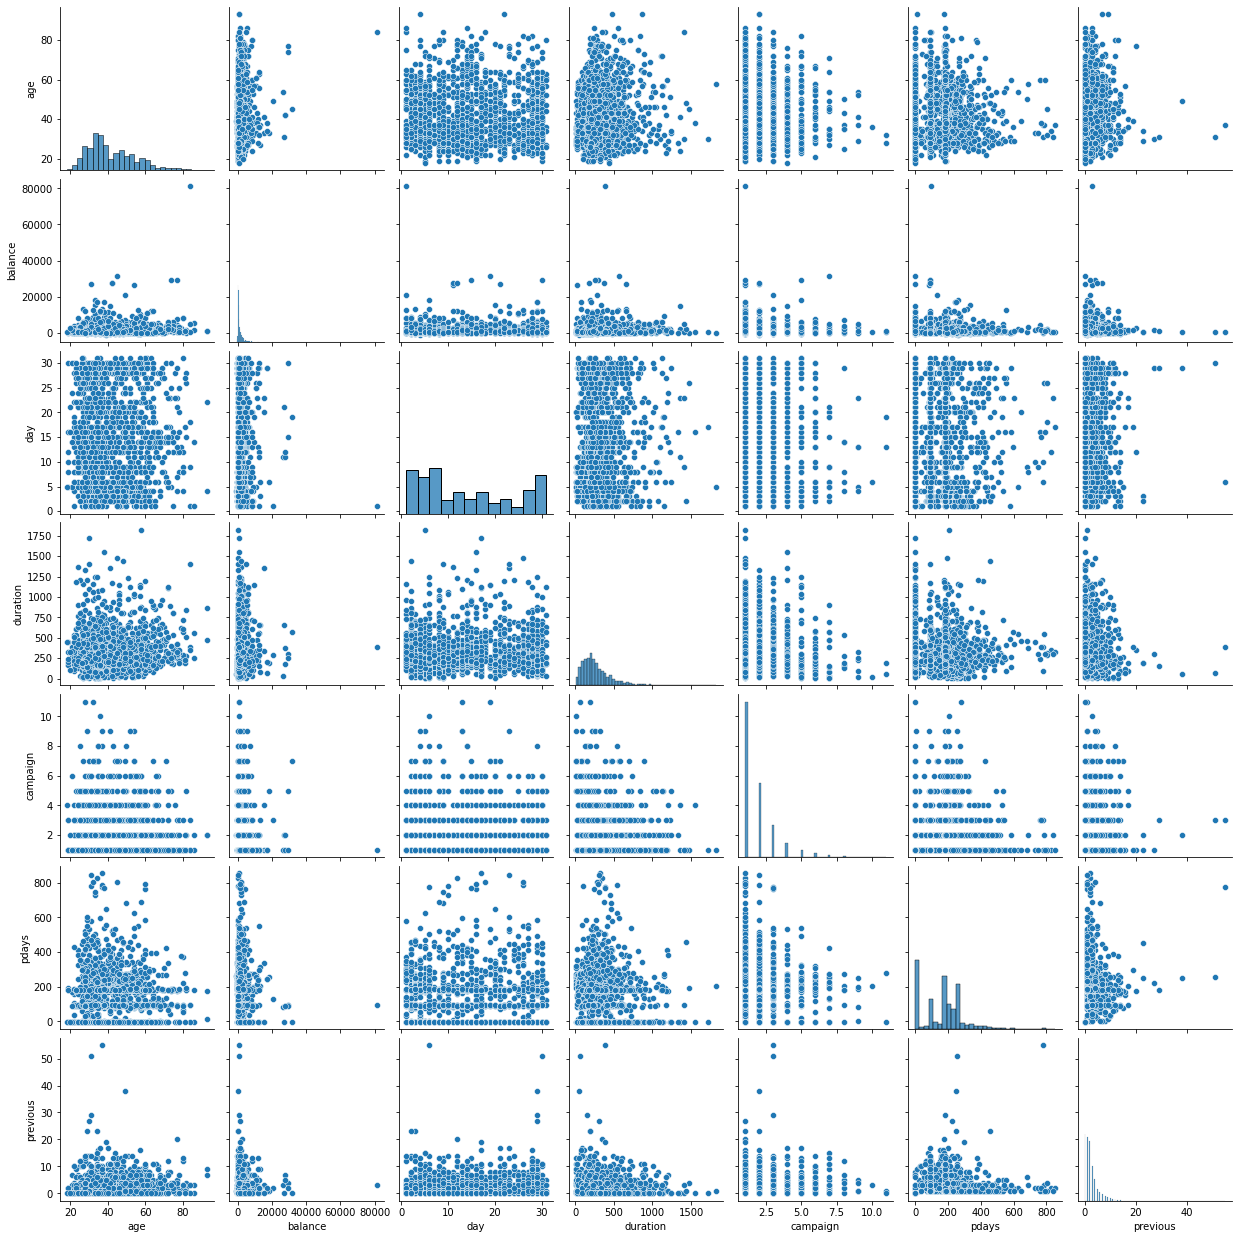

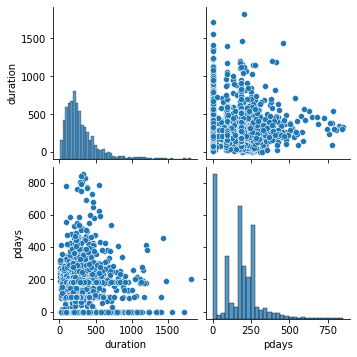

In [228]:
# note that by applying the method dropna() we drop all rows with missing values
sns.pairplot(data=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].dropna())
sns.pairplot(data=df[['duration', 'pdays']].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

#### B.2. Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. `Property_Area`, `Gender`, `Education`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `Gender` the frequency table can be printed by the command:

In [229]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

We can see that the number of males in the dataset is more than three times larger than the number of females. We can also check the total count of values in column `Gender` with the command:

In [230]:
df['education'].count()

1896

That is, there are 13 missing values in column `Gender`.

## C. Distribution Analysis for Numerical Attributes

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes.

Let's take, for example, the numerical attributes `ApplicantIncome` and `LoanAmount`.

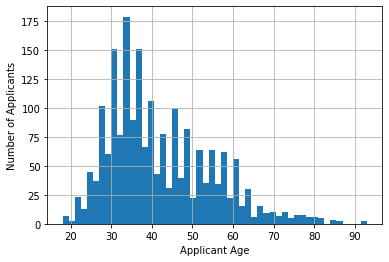

In [231]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['age'].hist(bins=50)
plt.xlabel('Applicant Age')
plt.ylabel('Number of Applicants')
plt.show()

In the histogram above, we observe that there are few extreme values of `ApplicantIncome`. The use of 50 bins allows to depict the distribution clearly.

Next, we look at box plots to understand the distribution better.

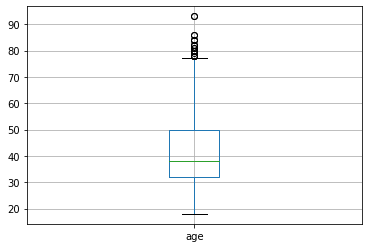

In [232]:
df.boxplot(column='age')
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

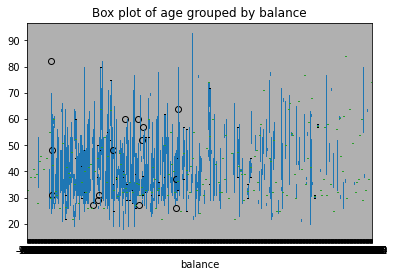

In [233]:
# Box plots of age, grouped by the categorical attribute balance
df.boxplot(column='age', by='balance')
plt.title('Box plot of age grouped by balance')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is no substantial difference between the mean income of graduates and non-graduates. But there are a higher number of graduates with very high incomes.

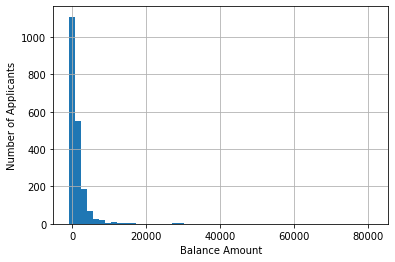

In [234]:
# Next, we examine a histogram of the numerical attribute balance

df['balance'].hist(bins=50)
plt.xlabel("Balance Amount")
plt.ylabel('Number of Applicants')
plt.show()

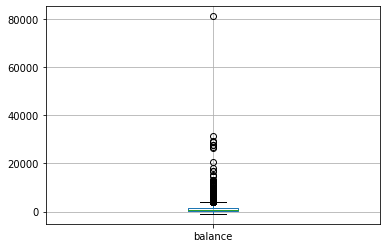

In [235]:
# Box plot of balance
df.boxplot(column='balance')
plt.show()

Again, there are some extreme values. Clearly, both `age` and `balance` require some amount of data munging. `balance` has missing values as well as many extreme values, while `age` has a few extreme values, which demand deeper understanding. We will take this up in the next lab exercise.

Finally, let's examine the relationship between `age` and `balance` with a scatter plot.

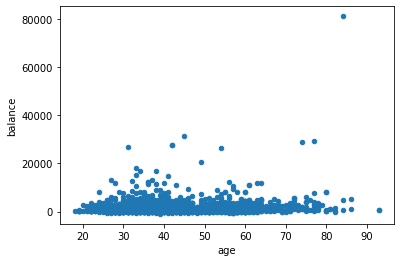

In [236]:
df.plot.scatter(x='age', y='balance')
plt.show()

Based on this scatter plot, we can say that balance tends to increase the maximum balance, but that the vast majority of balances stay around the same level. This majority seems to gradually reduce as age increases however. We can use `Seaborn's regplot` to draw a line that best gits the relation between two numeric attributes.

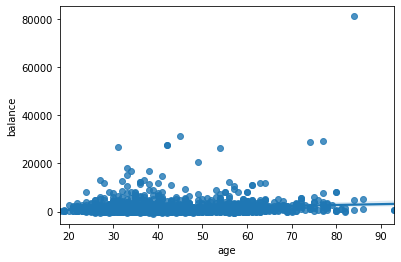

In [237]:
sns.regplot(data=df, x='age', y='balance')
plt.show()

This regplot seems to indicate that the average balance gradually increases as age increases.

## D. Box Plot Variations

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

/home/thomas/.local/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


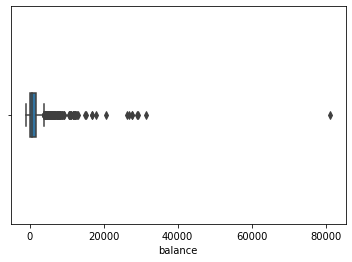

In [238]:
#First, let's draw a seaborn-style box plot for balance

sns.boxplot(x=df['balance'], orient='v', width=0.2)
plt.show()

/home/thomas/.local/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


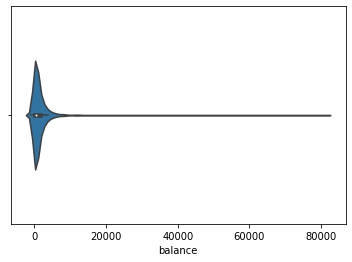

In [239]:
#Violin plot for balance

sns.violinplot(x=df['balance'], orient='v', width=0.5)
plt.show()

/home/thomas/.local/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


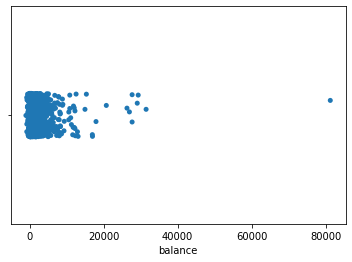

In [240]:
#Strip plot for balance

sns.stripplot(x=df['balance'], jitter=True, orient='v')
plt.show()

/home/thomas/.local/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/thomas/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


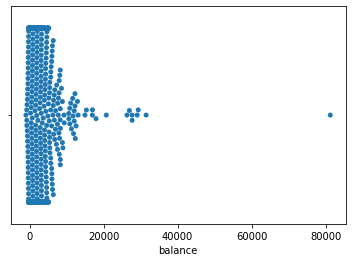

In [241]:
#Swarm plot for balance

sns.swarmplot(x=df['balance'], orient='v')
plt.show()

Let's redraw the box plots of `age` grouped by the categorical attribute `education` as violin plots.

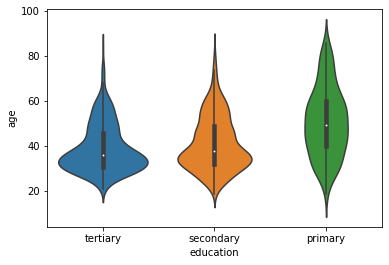

In [242]:
sns.violinplot(data=df, x='education', y='age')
plt.show()

We can split each violin plot by a binary attribute. For example, we can add `contact` to the plot above as follows.

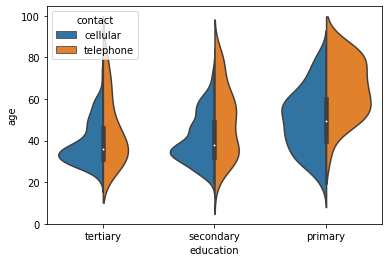

In [243]:
sns.violinplot(data=df, x='education', y='age', hue='contact', split=True)
plt.show()

The plot above suggest that male graduates in our dataset have more even distribution of income than female graduates, while the opposite is true for applicants who are not graduates.

## E. Distribution Analysis for Categorical Attributes

As noted above `subscribed` is rather a categorical attribute with two categories/values:
- 0 - the applicant does not subscribe
- 1 - the applicant subscribes

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between attributes `subscribed` and `loan`.

First, let's take a look at the frequency table for attribute `loan`:

In [244]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for previous:')
print(frequency_table)

Frequency Table for previous:
yes     250
no     1750
Name: loan, dtype: int64


Next, build a pivot table for `loan` and `subscribed`, i.e. find the mean `loan` for both `subscribed`=0 and `subscribed`=1.

In [245]:
pivot_table_LC = df.pivot_table(values='loan',
                                index='subscribed',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())

Here the values of `loan` are grouped by the index `subscribed`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `subscribed` are replaced by 1s and 0s, respectively.

In [246]:
# Print pivot table
print(pivot_table_LC)

             loan
subscribed       
no          0.207
yes         0.043


The pivot table can be interpreted as follows. The probability for succeeding in getting a person with a loan subscribed is 4.3%, and without a loan is 20.7%.

Let's plot `loan` and the probability of subscribing based on `loan`.

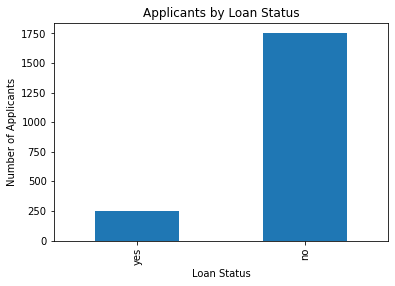

In [247]:
# Plot the frequency table for Loan Status
frequency_table.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Loan Status')
plt.show()

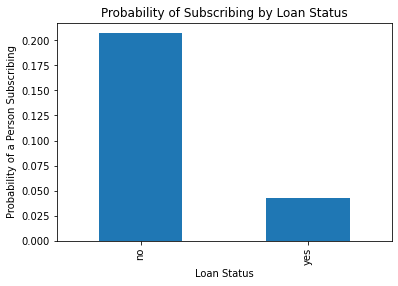

In [248]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Probability of a Person Subscribing')
plt.title('Probability of Subscribing by Loan Status')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

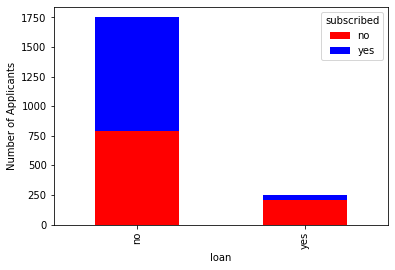

In [249]:
crosstab_CL = pd.crosstab(df['loan'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

Furthermore, we can stackchart `loan` and `housing` against `subscribed`.

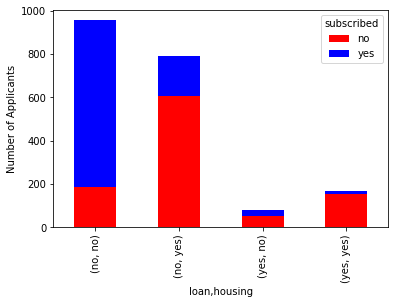

In [250]:
crosstab_CGL = pd.crosstab([df['loan'], df['housing']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

The plot above suggests that those with a house and without a loan are the most likely to get a subscription.

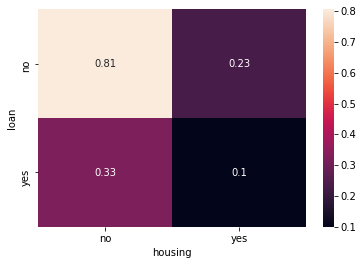

In [251]:
pivot_table_LCG = df.pivot_table(values='subscribed',
                           index='loan',
                           columns='housing',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

From the heatmap displayed above, it can be inferred that a person without a loan or housing is far more likely to get a subscription. The greatest factor in getting a loan (between loan and housing) is the lack of housing.